In [15]:
import numpy as np
from MountainCarEnv import MountainCarEnv
import matplotlib.pyplot as plot

In [16]:
env = MountainCarEnv(render_mode="rbg_array")

In [17]:
# Global vars

pos_space = np.linspace(env.min_position, env.max_position, 10)
vel_space = np.linspace(-env.max_speed, env.max_speed, 10)
Q = np.zeros((len(pos_space), len(vel_space), env.action_space.n))


In [18]:
# Functions

def epsilon_greedy_policy(state, Q, epsilon):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state[0], state[1]])
    return action

def get_state(obs):
    pos, vel = obs
    pos_bin = np.digitize(pos, pos_space)
    vel_bin = np.digitize(vel, vel_space)
    return pos_bin, vel_bin

def run_mountain_car(Q, epsilon, alpha, gamma, test=False):
    done = False
    totalReward = 0
    obs = env.reset()
    state = get_state(obs)
    while not done:
        action = epsilon_greedy_policy(state, Q, epsilon)
        obs, reward, done, _ = env.step(action)
        totalReward += reward
        newState = get_state(obs)
        if not test:
            delta = alpha * (reward + gamma * np.max(Q[newState[0], newState[1]]) - Q[state[0], state[1], action])
            Q[state[0], state[1], action] += delta
        state = newState
    return totalReward



In [19]:
# Training

numOfEpisodes = 10000
printInterval = 1000

epsilon=1
minEpsilon = 0.01
reduction = 2*epsilon/numOfEpisodes

alpha=0.1
gamma=0.99

totalRewards = np.zeros(numOfEpisodes)
totalQ = np.zeros(numOfEpisodes)

for i in range(numOfEpisodes):
    totalReward = run_mountain_car(Q, epsilon, alpha, gamma)
    totalRewards[i] = totalReward
    totalQ[i] = np.mean(Q)
    if epsilon > minEpsilon:
        epsilon -= reduction
    if (i+1) % printInterval == 0:
        print(f"Episode {i+1} out of {numOfEpisodes}; Reward {totalReward}; Epsilon {epsilon}")




Episode 1000 out of 10000; Reward -500.0; Epsilon 0.800000000000022
Episode 2000 out of 10000; Reward -500.0; Epsilon 0.600000000000044
Episode 3000 out of 10000; Reward -500.0; Epsilon 0.4000000000000661
Episode 4000 out of 10000; Reward -500.0; Epsilon 0.20000000000008117
Episode 5000 out of 10000; Reward -174.0; Epsilon 0.0098000000000775
Episode 6000 out of 10000; Reward -138.0; Epsilon 0.0098000000000775
Episode 7000 out of 10000; Reward -353.0; Epsilon 0.0098000000000775
Episode 8000 out of 10000; Reward -147.0; Epsilon 0.0098000000000775
Episode 9000 out of 10000; Reward -500.0; Epsilon 0.0098000000000775
Episode 10000 out of 10000; Reward -164.0; Epsilon 0.0098000000000775


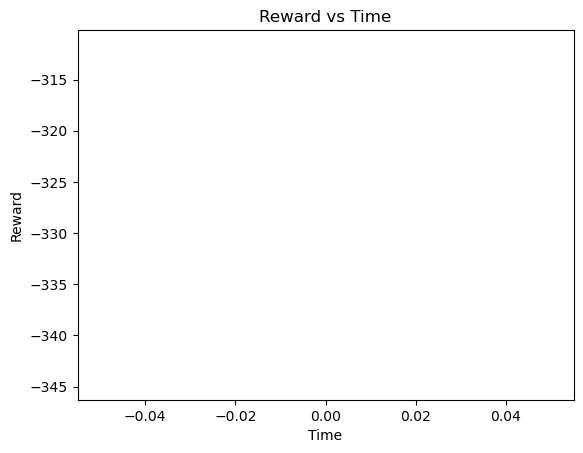

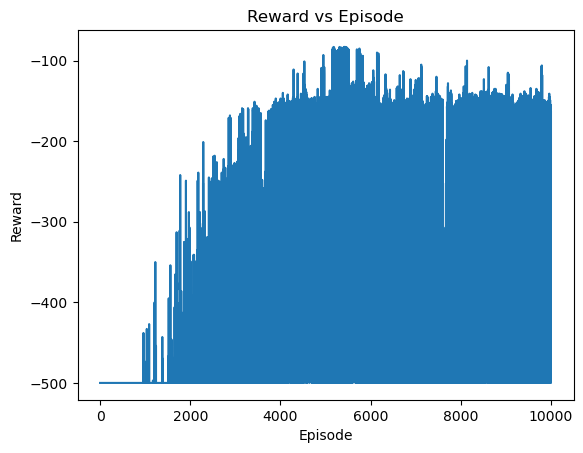

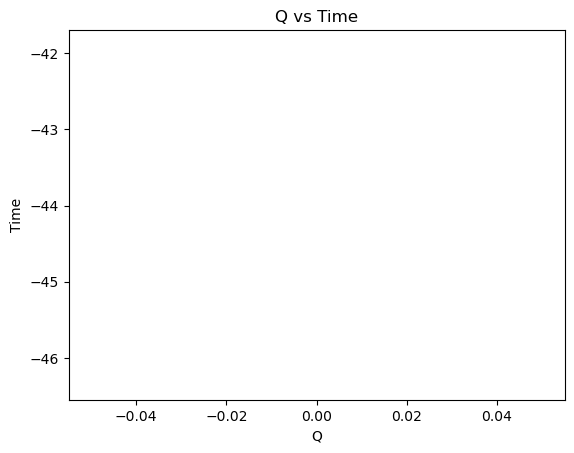

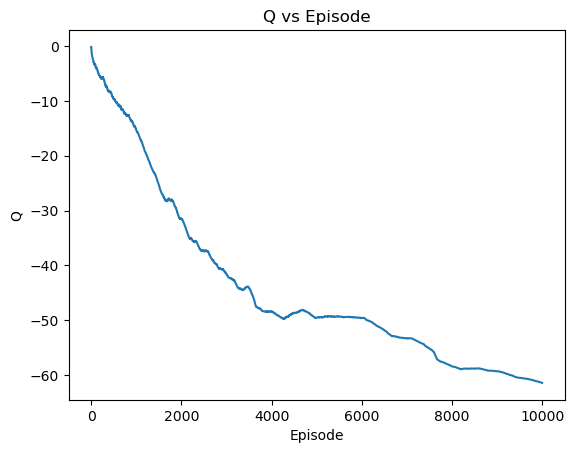

In [20]:
# Training plots

continuousInterval = 20000
avgRewards = np.zeros((int)(numOfEpisodes/continuousInterval))
avgQ = np.zeros((int)(numOfEpisodes/continuousInterval))

for i in range(numOfEpisodes):
    if (i+1) % continuousInterval == 0:
        index = (int)(i/continuousInterval)
        avgQ[index] = np.mean(totalQ[i+1-continuousInterval:i+1])
        avgRewards[index] = np.mean(totalRewards[i+1-continuousInterval:i+1])



plot.plot(avgRewards)
plot.xlabel("Time")
plot.ylabel("Reward")
plot.title("Reward vs Time")
plot.show()
plot.close()

plot.plot(totalRewards)
plot.xlabel("Episode")
plot.ylabel("Reward")
plot.title("Reward vs Episode")
plot.show()
plot.close()


plot.plot(avgQ)
plot.xlabel("Q")
plot.ylabel("Time")
plot.title("Q vs Time")
plot.show()
plot.close()

plot.plot(totalQ)
plot.xlabel("Episode")
plot.ylabel("Q")
plot.title("Q vs Episode")
plot.show()
plot.close()




In [23]:
# Testing

numOfTests = 2000
printTestInterval = 100
totalTestingRewards = np.zeros(numOfTests)

for i in range(numOfTests):
    totalTestingRewards[i] = run_mountain_car(Q, 0, alpha, gamma, True)
    if (i+1) % printTestInterval == 0:
        print(f"Test {i+1} out of {numOfTests}; Reward {totalTestingRewards[i]}")
    if i == numOfTests+1:
        env.render()




Test 100 out of 2000; Reward -233.0
Test 200 out of 2000; Reward -234.0
Test 300 out of 2000; Reward -219.0
Test 400 out of 2000; Reward -235.0
Test 500 out of 2000; Reward -232.0
Test 600 out of 2000; Reward -484.0
Test 700 out of 2000; Reward -233.0
Test 800 out of 2000; Reward -500.0
Test 900 out of 2000; Reward -500.0
Test 1000 out of 2000; Reward -293.0
Test 1100 out of 2000; Reward -500.0
Test 1200 out of 2000; Reward -241.0
Test 1300 out of 2000; Reward -500.0
Test 1400 out of 2000; Reward -233.0
Test 1500 out of 2000; Reward -228.0
Test 1600 out of 2000; Reward -305.0
Test 1700 out of 2000; Reward -500.0
Test 1800 out of 2000; Reward -227.0
Test 1900 out of 2000; Reward -233.0
Test 2000 out of 2000; Reward -294.0


In [26]:
# Testing plots

continuousTestingInterval = 100
avgTestingRewards = np.zeros((int)(numOfEpisodes/continuousInterval))

for i in range(numOfTests):
    if (i+1) % continuousTestingInterval == 0:
        index = (int)(i/continuousTestingInterval)
        avgTestingRewards[index] = np.mean(totalTestingRewards[i+1-continuousTestingInterval:i+1])


plot.plot(avgTestingRewards)
plot.xlabel("Time")
plot.ylabel("Reward")
plot.title("Reward vs Time")
plot.show()
plot.close()

plot.plot(totalTestingRewards)
plot.xlabel("Episode")
plot.ylabel("Reward")
plot.title("Reward vs Episode")
plot.show()
plot.close()

IndexError: index 1 is out of bounds for axis 0 with size 1